<h1>Final Project - Big Data</h1>

  <p><strong>Kelompok:</strong> 3</p>
  <p><strong>Judul:</strong> Data - Beasiswa</p>

  <p><strong>Anggota:</strong></p>
  <table>
    <tr>
      <td class="nama">Muhammad Daud Faizurrahman</td>
      <td class="nim">(23.11.5863)</td>
    </tr>
    <tr>
      <td class="nama">Muhammad Imam Hakim</td>
      <td class="nim">(23.11.5857)</td>
    </tr>
    <tr>
      <td class="nama">Muhammad Alif Indrastata</td>
      <td class="nim">(23.11.5851)</td>
    </tr>
    <tr>
      <td class="nama">Muhammad Vatrik Alfaredzi</td>
      <td class="nim">(23.11.5858)</td>
    </tr>
    <tr>
      <td class="nama">Wibi Trie Atmaja</td>
      <td class="nim">(23.11.5817)</td>
    </tr>
  </table>

In [ ]:
#install library & connect drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Semester 4/Big Data & Predictive Analytics/Final Project - UAS/Data_Beasiswa.csv')
df.head(5)

,No,Nama Lengkap,Prodi,Jenis Kelamin,Jarak Tempat Tinggal kekampus (Km),Asal Sekolah,Tahun Lulus,SKS,Ikut Organisasi,Ikut UKM,IPK,Pekerjaan Orang Tua,Penghasilan,Tanggungan,Status Beasiswa
0,1,GALAN PRASETIO,Bimbingan dan Konseling | Reguler,L,Dekat,SMAN 1 GEDONG TATAAN,2020,21,Ikut,Ikut,3.5700,Wiraswasta,Sedang,4,Terima
1,2,FINGKY RANDIANSYAH,Bimbingan dan Konseling | Reguler,L,Dekat,SMK HAMPAR BAIDURI,2020,21,Tidak,Ikut,2.9500,Buruh,Sedang,2,Tidak
2,3,ADELIA PANE,Bimbingan dan Konseling | Reguler,P,Dekat,SMK HAMPAR BAIDURI,2020,21,Tidak,Ikut,3.6700,Petani,Sedang,4,Terima
3,4,DWI HANDOKO,Bimbingan dan Konseling | Reguler,L,Dekat,SMA MA'ARIF NU BUMIRESTU,2020,21,Tidak,Ikut,3.1900,Wiraswasta,Tinggi,2,Tidak
4,5,DESTRI FERAWANTI GUSTINI,Bimbingan dan Konseling | Reguler,P,Jauh,SMA 2 NEGERI AGUNG,2020,21,Tidak,Ikut,3.1900,Wiraswasta,Sedang,2,Tidak


In [ ]:
#Melakukan Pengecekan Data, apakah ada data yg kosong
df.isnull().sum()

,0
No,0
Nama Lengkap,0
Prodi,0
Jenis Kelamin,0
Jarak Tempat Tinggal kekampus (Km),0
Asal Sekolah,0
Tahun Lulus,0
SKS,0
Ikut Organisasi,0
Ikut UKM,0


In [ ]:
df.describe()

,No,Tahun Lulus,SKS,IPK,Tanggungan
count,1042.0000,1042.0000,1042.0000,1042.0000,1042.0000
mean,521.9798,2019.4952,20.2793,3.3132,2.5893
std,301.3764,0.7708,1.6730,0.3395,1.1852
min,1.0000,2018.0000,18.0000,0.4200,1.0000
25%,261.2500,2019.0000,19.0000,3.1500,2.0000
50%,521.5000,2020.0000,20.0000,3.3300,2.0000
75%,782.7500,2020.0000,21.0000,3.5300,3.0000
max,1043.0000,2020.0000,24.0000,3.9100,5.0000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  1042 non-null   int64  
 1   Nama Lengkap                        1042 non-null   object 
 2   Prodi                               1042 non-null   object 
 3   Jenis Kelamin                       1042 non-null   object 
 4   Jarak Tempat Tinggal kekampus (Km)  1042 non-null   object 
 5   Asal Sekolah                        1042 non-null   object 
 6   Tahun Lulus                         1042 non-null   int64  
 7   SKS                                 1042 non-null   int64  
 8   Ikut Organisasi                     1042 non-null   object 
 9   Ikut UKM                            1042 non-null   object 
 10  IPK                                 1042 non-null   float64
 11  Pekerjaan Orang Tua                 1042 no

#Visualisasi<h2>

Diagram Lingkaran

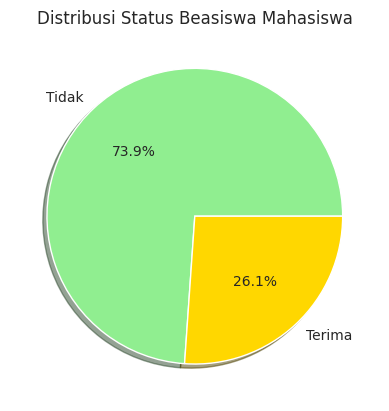

In [ ]:
status_counts = df['Status Beasiswa'].value_counts()
votes = status_counts.values
labels = status_counts.index
explode = [0] * len(labels)
colors = ['#90EE90', '#FFD700', '#DC143C'][:len(labels)]  # Biar tidak error jika label < 3

plt.title('Distribusi Status Beasiswa Mahasiswa')
plt.pie(
    votes,            # Use the counts of each category as the values
    labels=labels,    # Use the category names as the labels
    autopct='%1.1f%%',
    colors=colors,    # Use the defined colors
    explode=explode,  # Use the explode tuple
    shadow=True
)
plt.show()

Diagram Batang

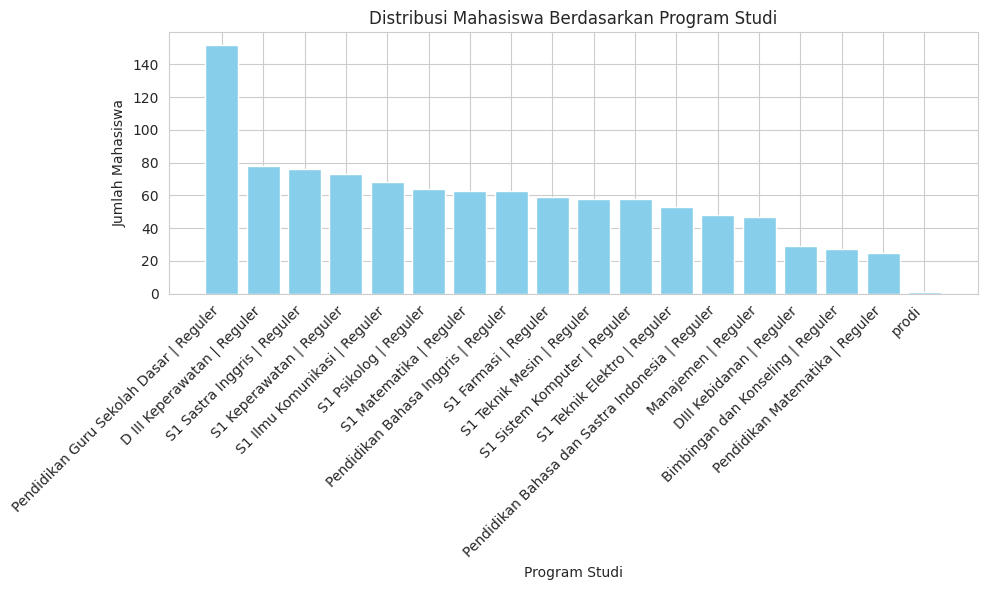

In [ ]:
prodi_counts = df['Prodi'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(prodi_counts.index, prodi_counts.values, color='skyblue')
plt.xlabel('Program Studi')
plt.ylabel('Jumlah Mahasiswa')
plt.title('Distribusi Mahasiswa Berdasarkan Program Studi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Grafik Garis

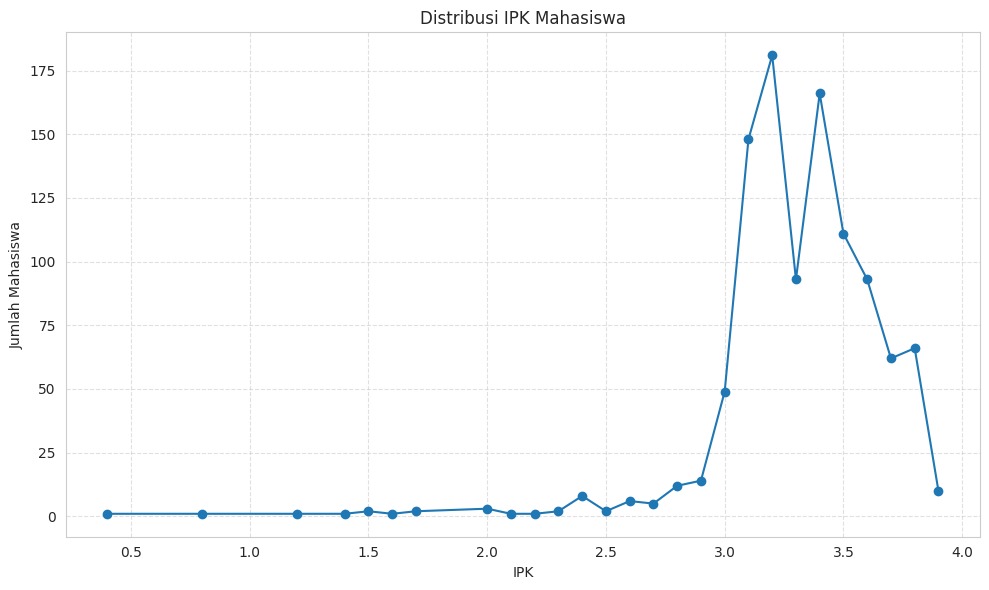

In [ ]:
# Membuat distribusi IPK (dibulatkan agar jumlah kategori lebih sedikit)
ipk_rounded = df['IPK'].round(1)  # Bulatkan ke satu angka di belakang koma
ipk_counts = ipk_rounded.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(ipk_counts.index, ipk_counts.values, marker='o', linestyle='-')
plt.xlabel('IPK')
plt.ylabel('Jumlah Mahasiswa')
plt.title('Distribusi IPK Mahasiswa')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Grafik Scatter Plot

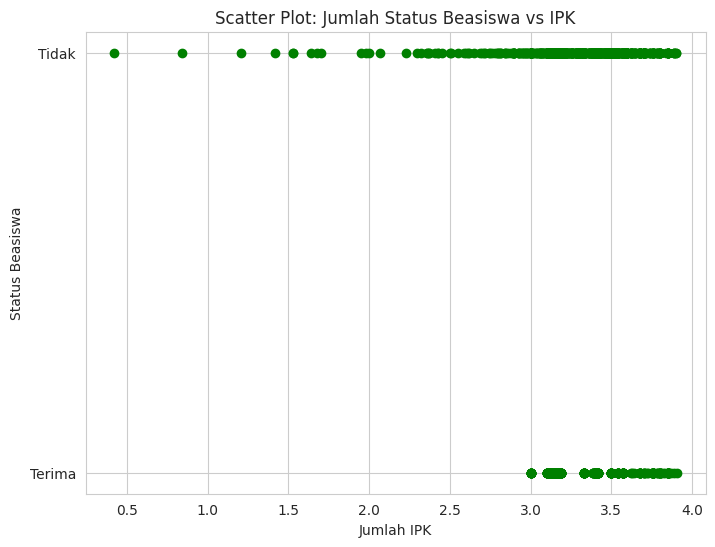

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['IPK'], df['Status Beasiswa'], color='green')

plt.xlabel('Jumlah IPK')
plt.ylabel('Status Beasiswa')
plt.title('Scatter Plot: Jumlah Status Beasiswa vs IPK')
plt.grid(True)
plt.show()

<h3>Korelasi Heatmap dan Endcoding

Setelah Melihat Tipe datanya ternyata masih banyak data yg bertipe object, Langkah selanjutnya sebelum visualisasi agar mudah mencari korelasi dapat dengan cara **Mengubahnya menjadi Numerik**

In [ ]:
#Menghapus data yg tidak penting
df.drop(['No', 'Nama Lengkap'],axis=1, inplace=True)

#Encoding Data
#inisialisasi LabelEncoder
from sklearn.preprocessing import LabelEncoder #import labelencoder
label_encoder=LabelEncoder()

#List kolom yang ingin diencode
columns_to_encode=['Asal Sekolah']

# 1. ENCODING JENIS KELAMIN
df['Jenis Kelamin'] = df['Jenis Kelamin'].map({'L': 1, 'P': 0})

# 2. ENCODING STATUS BEASISWA
df['Status Beasiswa'] = df['Status Beasiswa'].map({'Terima': 1, 'Tidak': 0})

# 3. ENCODING JARAK TEMPAT TINGGAL (semakin jauh nilainya semakin tinggi)
df['Jarak Tempat Tinggal kekampus (Km)'] = df['Jarak Tempat Tinggal kekampus (Km)'].map({
    'Dekat': 1,
    'Jauh': 2
})

# 4. ENCODING PENGHASILAN ORANG TUA
df['Penghasilan'] = df['Penghasilan'].map({
    'Rendah': 1,
    'Sedang': 2,
    'Tinggi': 3
})

# 5. ENCODING ORGANISASI DAN UKM
df['Ikut Organisasi'] = df['Ikut Organisasi'].map({'Ikut': 1, 'Tidak': 0})
df['Ikut UKM'] = df['Ikut UKM'].map({'Ikut': 1, 'Tidak': 0})

# 6. ENCODING PEKERJAAN ORANG TUA
def encode_pekerjaan(pekerjaan):
    pekerjaan = str(pekerjaan).strip().lower()

    if pekerjaan in ["sudah meninggal"]:
        return 0
    elif pekerjaan in ["buruh", "petani", "nelayan", "operator"]:
        return 1
    elif pekerjaan in ["pedagang", "wiraswasta", "wirausaha"]:
        return 2
    elif pekerjaan in ["karyawan swasta", "pensiunan"]:
        return 3
    elif pekerjaan in ["pns", "dosen", "guru", "pegawai negeri", "asn"]:
        return 4
    elif any(keyword in pekerjaan for keyword in [
        "engineer", "developer", "analyst", "scientist", "manager", "planner", "designer",
        "consultant", "coordinator", "technician", "officer", "programmer", "professor",
        "research", "architect", "nurse", "doctor", "accountant", "secretary", "editor",
        "executive", "marketing", "sales", "geologist", "chemist", "auditor", "librarian",
        "assistant", "administrator", "teacher", "paralegal", "web", "project", "speech pathologist",
        "clinical", "physician", "therapist", "media", "qa", "qa/qc", "business", "tax",
        "actuary", "financial", "associate"
    ]):
        return 5
    else:
        return 2  # fallback default

df['Pekerjaan Orang Tua'] = df['Pekerjaan Orang Tua'].apply(encode_pekerjaan)


# Membersihkan nilai di kolom "Prodi"
df['Prodi'] = df['Prodi'].str.replace(r"\s*\|\s*Reguler", "", regex=True).str.strip()

# Buat skema peringkat/tingkatan prodi (semakin tinggi nilai, dianggap semakin bergengsi atau prospek)
prodi_rank = {
    "S1 Teknik Elektro": 10,
    "S1 Teknik Mesin": 10,
    "S1 Sistem Komputer": 9,
    "S1 Farmasi": 9,
    "S1 Matematika": 8,
    "S1 Keperawatan": 8,
    "S1 Psikolog": 7,
    "S1 Ilmu Komunikasi": 7,
    "S1 Sastra Inggris": 6,
    "Manajemen": 6,
    "Pendidikan Matematika": 6,
    "Pendidikan Guru Sekolah Dasar": 5,
    "Pendidikan Bahasa dan Sastra Indonesia": 5,
    "Bimbingan dan Konseling": 5,
    "DIII Kebidanan": 4,
    "D III Keperawatan": 4
}

# Mapping nilai ke kolom "Prodi"
df["Prodi"] = df["Prodi"].map(prodi_rank).fillna(3).astype(int)  # fallback nilai default 3 untuk

#Loop melalui kolom dan lakukan encoding
for column in columns_to_encode:
  df[column] = label_encoder.fit_transform(df[column])
  #print(f"{column}:", list(label_encoder.classes_)) #Melihat opsi kategorikalnya

print("\nData setelah encoding:")

print(df.head())


Data setelah encoding:
   Prodi  Jenis Kelamin  Jarak Tempat Tinggal kekampus (Km)  Asal Sekolah  \
0      5              1                                   1           124   
1      5              1                                   1           156   
2      5              0                                   1           156   
3      5              1                                   1            27   
4      5              0                                   2            25   

   Tahun Lulus  SKS  Ikut Organisasi  Ikut UKM    IPK  Pekerjaan Orang Tua  \
0         2020   21                1         1 3.5700                    2   
1         2020   21                0         1 2.9500                    1   
2         2020   21                0         1 3.6700                    1   
3         2020   21                0         1 3.1900                    2   
4         2020   21                0         1 3.1900                    2   

   Penghasilan  Tanggungan  Status Beasiswa 

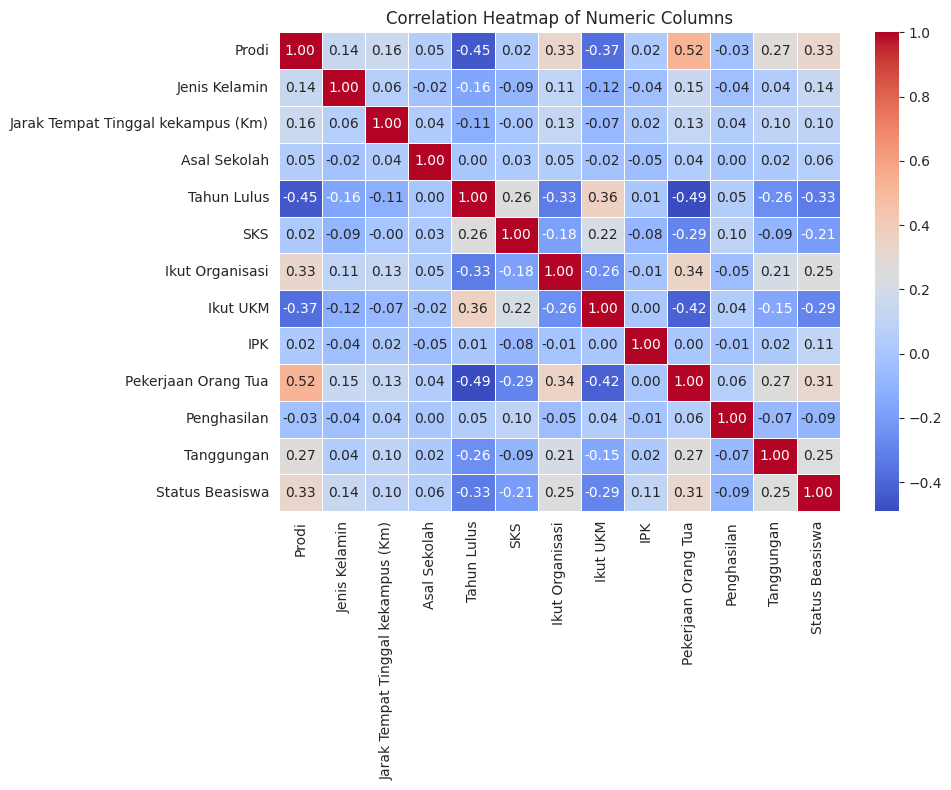

In [ ]:
# Ambil semua kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Hitung korelasi antar kolom numerik
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()

In [ ]:
# Tampilkan distribusi
print(df['Pekerjaan Orang Tua'].value_counts().sort_index())
print(df["Prodi"].value_counts().sort_index())

Pekerjaan Orang Tua
0     18
1    136
2    319
3     49
4     94
5    426
Name: count, dtype: int64
Prodi
3      64
4     107
5     227
6     148
7     132
8     136
9     117
10    111
Name: count, dtype: int64


In [ ]:
#Hapus Kolom yang tidak perlu
df.drop(['Asal Sekolah', 'Penghasilan'],axis=1, inplace=True)

df.head()

,Prodi,Jenis Kelamin,Jarak Tempat Tinggal kekampus (Km),Tahun Lulus,SKS,Ikut Organisasi,Ikut UKM,IPK,Pekerjaan Orang Tua,Tanggungan,Status Beasiswa
0,5,1,1,2020,21,1,1,3.5700,2,4,1
1,5,1,1,2020,21,0,1,2.9500,1,2,0
2,5,0,1,2020,21,0,1,3.6700,1,4,1
3,5,1,1,2020,21,0,1,3.1900,2,2,0
4,5,0,2,2020,21,0,1,3.1900,2,2,0


Setelah Menghapus kolom yg tidak perlu dan memiliki korelasi yg kecil terhadap status beasiswa

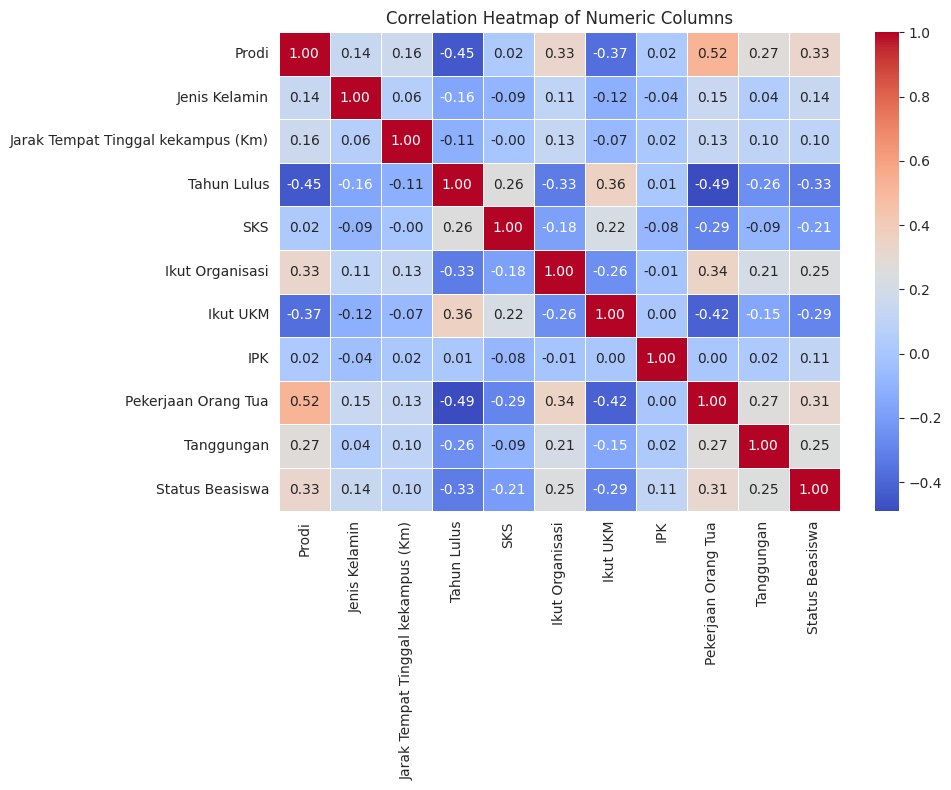

In [ ]:
# Ambil semua kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Hitung korelasi antar kolom numerik
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()

#Menentukan Fitur dan Target<h2>

In [ ]:
# Mendefinisikan fitur dan target
df_features = df.drop(['Status Beasiswa'], axis=1)
df_target = df['Status Beasiswa']

#Check columns in df_features
print(df_features.columns)

Index(['Prodi', 'Jenis Kelamin', 'Jarak Tempat Tinggal kekampus (Km)',
       'Tahun Lulus', 'SKS', 'Ikut Organisasi', 'Ikut UKM', 'IPK',
       'Pekerjaan Orang Tua', 'Tanggungan'],
      dtype='object')


#Normalisasi<h2>

In [ ]:
from sklearn.preprocessing import StandardScaler

cols=list(df.columns)
cols.remove('Status Beasiswa')

scaler=StandardScaler()
df[cols]=scaler.fit_transform(df[cols])
df.head()

,Prodi,Jenis Kelamin,Jarak Tempat Tinggal kekampus (Km),Tahun Lulus,SKS,Ikut Organisasi,Ikut UKM,IPK,Pekerjaan Orang Tua,Tanggungan,Status Beasiswa
0,-0.7486,1.3505,-0.8668,0.6552,0.4310,1.6537,0.5692,0.7566,-0.7954,1.1909,1
1,-0.7486,1.3505,-0.8668,0.6552,0.4310,-0.6047,0.5692,-1.0703,-1.4125,-0.4974,0
2,-0.7486,-0.7405,-0.8668,0.6552,0.4310,-0.6047,0.5692,1.0513,-1.4125,1.1909,1
3,-0.7486,1.3505,-0.8668,0.6552,0.4310,-0.6047,0.5692,-0.3631,-0.7954,-0.4974,0
4,-0.7486,-0.7405,1.1537,0.6552,0.4310,-0.6047,0.5692,-0.3631,-0.7954,-0.4974,0


#Training Code<h2>

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df_features, df_target, test_size=0.2, random_state=45)

#menampilkan 5 data teratas
print('Train set:',X_train.shape, y_train.shape)
print(X_train.head)
print('\n')
print('Test set:',X_test.shape, y_test.shape)
print(X_test.head())

Train set: (833, 10) (833,)
<bound method NDFrame.head of      Prodi  Jenis Kelamin  Jarak Tempat Tinggal kekampus (Km)  Tahun Lulus  \
137      6              1                                   1         2020   
19       5              1                                   1         2020   
412      5              1                                   1         2020   
417      5              0                                   1         2020   
979     10              0                                   2         2018   
..     ...            ...                                 ...          ...   
580      7              1                                   1         2018   
163      6              0                                   2         2020   
607      8              1                                   2         2020   
414      5              0                                   2         2020   
971     10              1                                   2         2018   

     

#Modeling<h2>

<h4>Linear Regression dengan beberapa variabel bebas<h4>

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Menampilkan koefisien
lr_model.coef_

array([ 0.03593257,  0.06215207,  0.0150758 , -0.03122306, -0.02974773,
        0.0602418 , -0.14103539,  0.13685204,  0.00799404,  0.05055349])

In [ ]:
# Menampilkan intercept
lr_model.intercept_

np.float64(63.12212211081633)

In [ ]:
# Menguji model dengan X_test

y_pred = lr_model.predict(X_test)
y_pred_continuous = lr_model.predict(X_test)
y_prob_manual = 1 / (1 + np.exp(-y_pred_continuous))
y_pred

array([ 0.07143044,  0.39848088,  0.23062421,  0.06575349,  0.09170534,
        0.20242259,  0.32794376,  0.3205159 ,  0.45137612,  0.20996245,
        0.69609026,  0.54741598,  0.19177771,  0.58203853,  0.19086149,
        0.04011772,  0.03174335,  0.50858725,  0.27285468,  0.41948602,
        0.47831747,  0.68043258,  0.10251577,  0.08822382,  0.34576037,
        0.01410066,  0.23062901,  0.47426971,  0.13761863,  0.15046316,
       -0.06783969,  0.4108831 ,  0.10145613,  0.12130747,  0.21061287,
        0.56715568,  0.21803304,  0.13329599,  0.34038947,  0.00874643,
       -0.07044277,  0.04269151,  0.63094555,  0.03486751,  0.56237108,
        0.37073419,  0.56942182,  0.12841379,  0.20843336,  0.15822821,
        0.070084  ,  0.15276137,  0.39147447,  0.43374463,  0.30953545,
        0.31782542,  0.37876546,  0.74976445,  0.02640187,  0.12828403,
        0.25430115,  0.20202999,  0.04464826, -0.00272553,  0.53853048,
        0.14482095,  0.593307  ,  0.21224324,  0.40039636, -0.05

#Klasifikasi<h2>

In [ ]:
# Prediksi kelas
#y_pred = model.predict(X_test)
y_pred_continuous = lr_model.predict(X_test)

threshold = 0.5
y_pred_class = (y_pred_continuous >= threshold).astype(int)

# Buat DataFrame untuk membandingkan hasil
# Menampilkan 15 data pertama agar lebih bervariasi
hasil_prediksi = pd.DataFrame({
    'Data Asli': y_test[:15].values,               # Mengambil nilai aktual dari y_test
    'Prediksi Kontinu': y_pred_continuous[:15],    # Menampilkan output asli model
    'Hasil Prediksi Kelas': y_pred_class[:15]      # Menampilkan hasil setelah threshold
})

# Atur format tampilan agar lebih mudah dibaca
pd.options.display.float_format = '{:.4f}'.format

# Tampilkan tabel
print(hasil_prediksi)

    Data Asli  Prediksi Kontinu  Hasil Prediksi Kelas
0           0            0.0714                     0
1           0            0.3985                     0
2           0            0.2306                     0
3           0            0.0658                     0
4           0            0.0917                     0
5           1            0.2024                     0
6           0            0.3279                     0
7           0            0.3205                     0
8           1            0.4514                     0
9           0            0.2100                     0
10          0            0.6961                     1
11          0            0.5474                     1
12          1            0.1918                     0
13          1            0.5820                     1
14          0            0.1909                     0


#Evaluasi<h2>

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred = lr_model.predict(X_test)

# Round the continuous predictions to the nearest integer to get discrete classes
y_pred_classes = np.round(y_pred).astype(int)
print('Data asli: \n', y_test[0:10])
print('\n')
print('Hasil prediksi (setelah pembulatan): \n', y_pred_classes[0:10])

# Evaluasi
acc = accuracy_score(y_test, y_pred_classes)
prec = precision_score(y_test, y_pred_classes, average='macro')
rec = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average='macro')
cm = confusion_matrix(y_test, y_pred_classes)

# Tampilkan hasil
print("Akurasi    :", acc)
print("Presisi    :", prec)
print("Recall     :", rec)
print("F1 Score   :", f1)
print("Confusion Matrix:\n", cm)
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred_classes))

Data asli: 
 381    0
568    0
154    0
536    0
383    0
253    1
941    0
224    0
887    1
363    0
Name: Status Beasiswa, dtype: int64


Hasil prediksi (setelah pembulatan): 
 [0 0 0 0 0 0 0 0 0 0]
Akurasi    : 0.7464114832535885
Presisi    : 0.6761689291101056
Recall     : 0.6333637816853163
F1 Score   : 0.6442496065773838
Confusion Matrix:
 [[134  17]
 [ 36  22]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.79      0.89      0.83       151
           1       0.56      0.38      0.45        58

    accuracy                           0.75       209
   macro avg       0.68      0.63      0.64       209
weighted avg       0.73      0.75      0.73       209



 Accuracy =TP + TN / TP + FP + FN + TN

True Negative (TN): 134
(Kelas 0 diprediksi benar sebagai kelas 0).

False Positive (FP): 17
(Kelas 0 diprediksi salah sebagai kelas 1).

False Negative (FN): 36
(Kelas 1 diprediksi salah sebagai kelas 0).

True Positive (TP): 22
(Kelas 1 diprediksi benar sebagai kelas 1).

Model cukup baik memprediksi kelas 0 (akurasi 74.6%), tetapi gagal mendeteksi kelas minoritas (1). Perlu intervensi untuk menangani ketidakseimbangan data dan meningkatkan recall kelas 1.

0 = Tidak diterima <br>
1 = Diterima

#Buat sample data<h2>

y=0.7378+(0.0359×Prodi)+(0.0622×Jenis Kelamin)+(0.0151×Jarak)+(0.0312×Tahun Lulus)+(0.0297×SKS)+(0.0602×Organisasi)+(0.1410×UKM)+(0.1369×IPK)+(0.0080×Pekerjaan Ortu)+(0.0506×Tanggungan)


In [ ]:
# Melakukan Pemeriksaaan Urutan data
print(X_train.columns.tolist())

['Prodi', 'Jenis Kelamin', 'Jarak Tempat Tinggal kekampus (Km)', 'Tahun Lulus', 'SKS', 'Ikut Organisasi', 'Ikut UKM', 'IPK', 'Pekerjaan Orang Tua', 'Tanggungan']


In [ ]:
[10, 1, 2, 2018, 18, 1, 0, 3.9, 4, 5],    # Acak 1 (Set, Diterima)
[8, 1, 2, 2020, 20, 1, 0, 3.7, 4, 4],     # Acak 2 (Set Standar, Diterima)
[5, 0, 1, 2022, 22, 0, 1, 3.0, 2, 2],     # Acak 3 (Set standar, tidak diterima)
[3, 0, 1, 2023, 24, 0, 1, 2.5, 1, 1],     # Acak 4 (Set dibawah standar, tidak diterima)
[1, 1, 2, 2023, 20, 1, 1, 2.0, 0, 6],     # Acak 5 (Set, kemungkinan besar tidak diterima)

([10, 1, 2, 2023, 144, 1, 1, 3.95, 0, 6],)

<h3>Sample 5 Data<h3>

In [ ]:
import numpy as np
import pandas as pd

# Kolom sesuai model
columns = [
    'Prodi', 'Jenis Kelamin', 'Jarak Tempat Tinggal kekampus (Km)',
    'Tahun Lulus', 'SKS', 'Ikut Organisasi', 'Ikut UKM',
    'IPK', 'Pekerjaan Orang Tua', 'Tanggungan'
]

# Data sample yang kamu berikan
data = [
    [10, 1, 2, 2018, 18, 1, 0, 3.9, 4, 5],
    [8, 1, 2, 2020, 20, 1, 0, 3.7, 4, 4],
    [5, 0, 1, 2022, 22, 0, 1, 3.0, 2, 2],
    [3, 0, 1, 2023, 24, 0, 1, 2.5, 1, 1],
    [1, 1, 2, 2023, 20, 1, 1, 2.0, 0, 6]
]

# Buat DataFrame
sample_data_df = pd.DataFrame(data, columns=columns)

# Prediksi nilai kontinu
prediction_continuous = lr_model.predict(sample_data_df)

# Klasifikasi dengan threshold
# prediction_class = (prediction_continuous >= 0.5).astype(int)
prediction_class = np.round(prediction_continuous).astype(int)

# Tampilkan hasil
for i in range(len(sample_data_df)):
    print(f"\nSample {i+1}")
    print(sample_data_df.iloc[i])
    print(f"Nilai Prediksi Kontinu: {prediction_continuous[i]:.4f}")
    print("Hasil Prediksi Kelas:", "✅ Diterima" if prediction_class[i] == 1 else "❌ Tidak Diterima")


Sample 1
Prodi                                  10.0000
Jenis Kelamin                           1.0000
Jarak Tempat Tinggal kekampus (Km)      2.0000
Tahun Lulus                          2018.0000
SKS                                    18.0000
Ikut Organisasi                         1.0000
Ikut UKM                                0.0000
IPK                                     3.9000
Pekerjaan Orang Tua                     4.0000
Tanggungan                              5.0000
Name: 0, dtype: float64
Nilai Prediksi Kontinu: 0.9089
Hasil Prediksi Kelas: ✅ Diterima

Sample 2
Prodi                                   8.0000
Jenis Kelamin                           1.0000
Jarak Tempat Tinggal kekampus (Km)      2.0000
Tahun Lulus                          2020.0000
SKS                                    20.0000
Ikut Organisasi                         1.0000
Ikut UKM                                0.0000
IPK                                     3.7000
Pekerjaan Orang Tua                     4.0000